TASK 8: 
Data Preprocessing

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns  

In [33]:
df = pd.read_csv('IRIS.csv', encoding='latin1')

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.shape

(150, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [38]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows)

Number of duplicate rows: 3
     sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


In [39]:
df = df.drop_duplicates()

In [40]:
df.shape

(147, 5)

Exercise 1: Calculate the mean, median, and mode of the sepal lengths in the Iris dataset.

In [41]:
import pandas as pd
from scipy import stats

# Calculate mean 
mean_sepal_length = df['sepal_length'].mean()

# Calculate median 
median_sepal_length = df['sepal_length'].median()

# Calculate mode 
mode_sepal_length = df['sepal_length'].mode()[0]  

# Print 
print(f"Mean of sepal lengths: {mean_sepal_length}")
print(f"Median of sepal lengths: {median_sepal_length}")
print(f"Mode of sepal lengths: {mode_sepal_length}")


Mean of sepal lengths: 5.856462585034014
Median of sepal lengths: 5.8
Mode of sepal lengths: 5.0


Exercise 2: Calculate the variance and standard deviation of the petal widths in the Iris dataset.

In [42]:
# Calculate variance 
variance = df['petal_width'].var()

# Calculate standard deviation 
std_dev = df['petal_width'].std()

# Print 
print(f"Variance of petal widths: {variance}")
print(f"Standard deviation of petal widths: {std_dev}")


Variance of petal widths: 0.5743733109682235
Standard deviation of petal widths: 0.7578742052400408


Exercise 3: Create a summary table that includes the mean, median, variance, and standard deviation for all numerical 
features in the dataset.

In [43]:
# Only numeric columns
numeric_cols = df.select_dtypes(include=['float64'])

# summary statistics
summary_stats = {
    'mean': numeric_cols.mean(),
    'median': numeric_cols.median(),
    'variance': numeric_cols.var(),
    'std_dev': numeric_cols.std()
}

# summary table
summary_table = pd.DataFrame(summary_stats)

# Print
print(summary_table)

                  mean  median  variance   std_dev
sepal_length  5.856463     5.8  0.687407  0.829100
sepal_width   3.055782     3.0  0.190977  0.437009
petal_length  3.780272     4.4  3.094471  1.759111
petal_width   1.208844     1.3  0.574373  0.757874


Exercise 4: Define a random variable for the sepal length and calculate the probability distribution of sepal lengths.

In [44]:
sepal_length = df['sepal_length']

# Calculate the frequency 
freq = sepal_length.value_counts().sort_index()

# Normalize frequencies to get probabilities
probability_dis = freq / len(sepal_length)

# Print the probability distribution
print(probability_dis)


sepal_length
4.3    0.006803
4.4    0.020408
4.5    0.006803
4.6    0.027211
4.7    0.013605
4.8    0.034014
4.9    0.027211
5.0    0.068027
5.1    0.061224
5.2    0.027211
5.3    0.006803
5.4    0.040816
5.5    0.047619
5.6    0.040816
5.7    0.054422
5.8    0.040816
5.9    0.020408
6.0    0.040816
6.1    0.040816
6.2    0.027211
6.3    0.061224
6.4    0.047619
6.5    0.034014
6.6    0.013605
6.7    0.054422
6.8    0.020408
6.9    0.027211
7.0    0.006803
7.1    0.006803
7.2    0.020408
7.3    0.006803
7.4    0.006803
7.6    0.006803
7.7    0.027211
7.9    0.006803
Name: count, dtype: float64


Exercise 5: Plot the probability distribution of sepal lengths using a histogram.

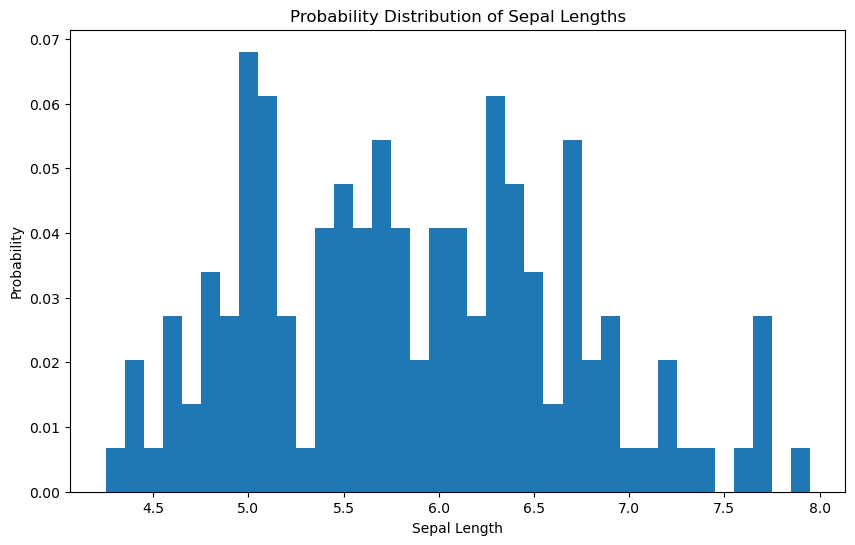

In [45]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(probability_distribution.index, probability_distribution.values, width=0.1)
plt.xlabel('Sepal Length')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sepal Lengths')
plt.show()

Exercise 6: Calculate the cumulative distribution function (CDF) for the petal lengths and plot it.

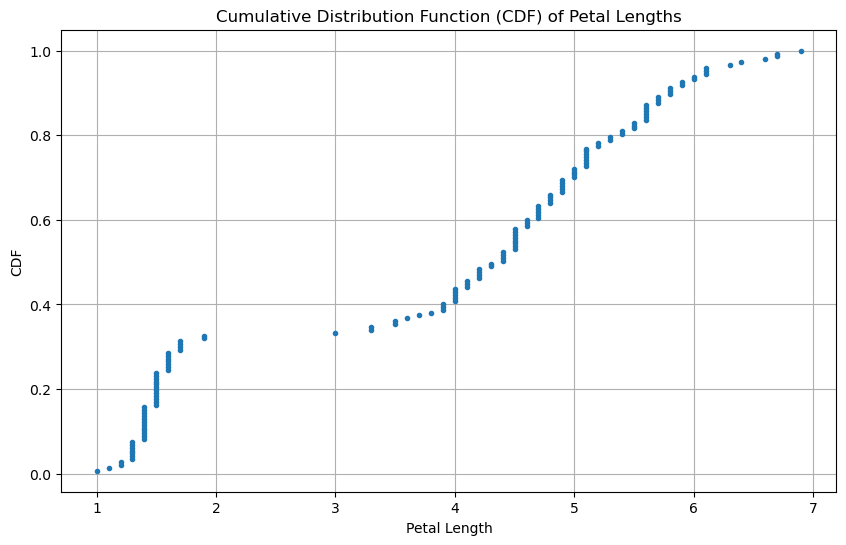

In [46]:
import numpy as np

petal_length = df['petal_length']

# Sort the petal lengths
sorted_petal_length = np.sort(petal_length)

# Calculate the CDF 
cdf_values = np.arange(1, len(sorted_petal_length) + 1) / len(sorted_petal_length)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(sorted_petal_length, cdf_values, marker='.', linestyle='none')
plt.title('Cumulative Distribution Function (CDF) of Petal Lengths')
plt.xlabel('Petal Length')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

Exercise 7: Calculate and plot the probability density function (PDF) for sepal width.

D:\softwares\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


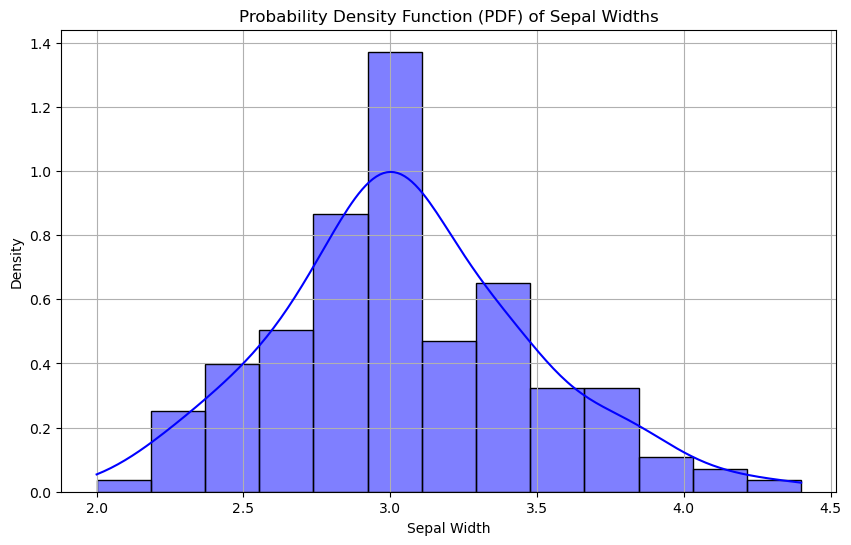

In [24]:
sepal_width = df['sepal_width']

# Plot (PDF) using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(sepal_width, kde=True, stat='density', color='blue', edgecolor='black')

plt.title('Probability Density Function (PDF) of Sepal Widths')
plt.xlabel('Sepal Width')
plt.ylabel('Density')

# Show 
plt.grid(True)
plt.show()

Exercise 8: Determine the probability of a randomly selected iris flower having a petal length greater than a given value.

Probability of petal length greater than 6.0: 0.0612


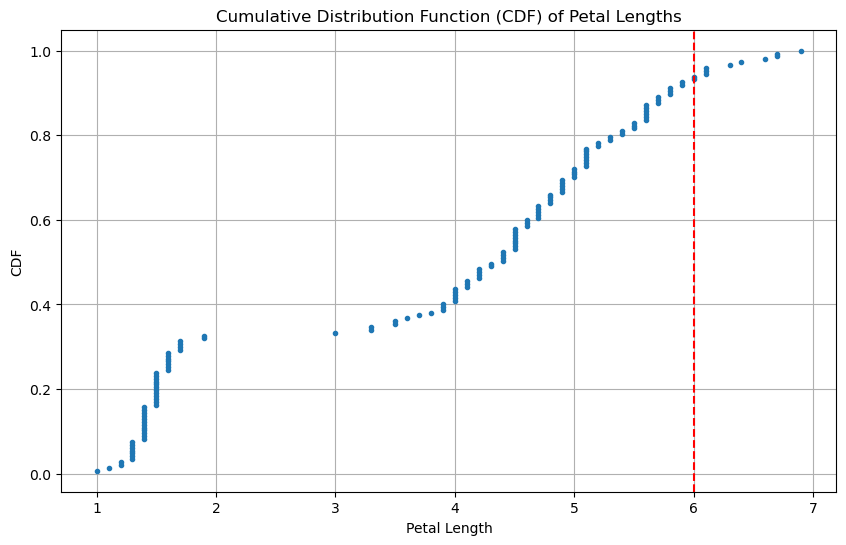

In [47]:
petal_length = df['petal_length']

# Sort 
sorted_petal_length = np.sort(petal_length)

# Calculate the CDF values
cdf_values = np.arange(1, len(sorted_petal_length) + 1) / len(sorted_petal_length)

# Function to calculate the probability of petal length greater than a given value
def probability_greater_than(value):
    # Find the CDF value at the given length
    cdf_at_value = np.searchsorted(sorted_petal_length, value, side='right') / len(sorted_petal_length)
    # The probability greater than 1 is 1 - CDF
    return 1 - cdf_at_value

# Example 
value = 6.0  
probability = probability_greater_than(value)
print(f"Probability of petal length greater than {value}: {probability:.4f}")

# Plot the CDF 
plt.figure(figsize=(10, 6))
plt.plot(sorted_petal_length, cdf_values, marker='.', linestyle='none')
plt.axvline(x=value, color='r', linestyle='--')
plt.title('Cumulative Distribution Function (CDF) of Petal Lengths')
plt.xlabel('Petal Length')
plt.ylabel('CDF')
plt.grid(True)
plt.show()

Exercise 9: Perform a hypothesis test to determine if there is a significant difference in the mean petal length 
between two species of iris flowers.

In [25]:
species1 = 'setosa'
species2 = 'versicolor'

petal_lengths_species1 = df[df['species'] == species1]['petal_length']
petal_lengths_species2 = df[df['species'] == species2]['petal_length']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(petal_lengths_species1, petal_lengths_species2)

# Print 
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05 
if p_value < alpha:
    print(f"There is a significant difference in mean petal length between {species1} and {species2}.")
else:
    print(f"There is no significant difference in mean petal length between {species1} and {species2}.")

T-statistic: nan
P-value: nan
There is no significant difference in mean petal length between setosa and versicolor.


Exercise: Calculate and interpret the covariance and correlation between sepal length and sepal width.

In [26]:
# Calculate covariance 
covariance = np.cov(df['sepal_length'], df['sepal_width'])[0, 1]

# Calculate correlation coefficient 
correlation = df['sepal_length'].corr(df['sepal_width'])

# Print 
print(f"Covariance between sepal length and sepal width: {covariance:.4f}")
print(f"Correlation between sepal length and sepal width: {correlation:.4f}")

Covariance between sepal length and sepal width: -0.0393
Correlation between sepal length and sepal width: -0.1094
